# A complete guide to Hodrick–Prescott filter in time-series analysis
https://analyticsindiamag.com/a-complete-guide-to-hodrick-prescott-filter-in-time-series-analysis/

+ Фильтр Ходрика-Прескотта или разложение Ходрика-Прескотта - это математический инструмент, который используется в анализе и моделировании временных рядов. 
+ Этот фильтр в основном полезен для удаления циклической составляющей из данных временных рядов.


В анализе и моделировании временных рядов детрендинг играет важнейшую роль, так как с его помощью мы знакомимся с циклическими и другими закономерностями временных рядов. 

Процесс детрендинга заключается в удалении эффекта тренда из временного ряда для выявления отличий значений от тренда. 

Используя различные фильтры, такие как 
+ полосовой фильтр (Band-Pass Filter),  
+ фильтр Бакстера-Кинга (BK Filter) и 
фильтр Ходрика-Прескотта, 

мы можем выполнить детрендинг временных рядов. 

В этой статье мы подробно рассмотрим один из этих фильтров для детрендинга временных рядов, фильтр Ходрика-Прескотта (HP), и его практическую реализацию. Основные моменты, которые будут обсуждаться в этой статье, перечислены ниже.

## About Hodrick–Prescott filter
+ Применение фильтра Ходрика-Прескотта во временных рядах позволяет получить гладкий временной ряд из временного ряда, в котором в большом количестве присутствуют такие компоненты временного ряда, как трендовый цикл и шум. 
+ Этот фильтр назван по именам экономистов Роберта Дж. Ходрика и Эдварда К. Прескотта.   

### How does the Hodrick–Prescott filter work?

Математически основная идея этого фильтра связана с концепциями разложения временных рядов. Поясним это математически на примере временного ряда $y_t$.

$$
y_t = \tau_t + c_t + \epsilon_t
$$

где
+ $\tau_t$ - трендовая компонента
+ $c_t$ - циклическая компонента
+ $\epsilon_t$ + шум

Краткосрочные колебания трендовой составляющей временного ряда могут быть скорректированы с помощью множителя . 

Трендовая составляющая временного ряда можно найти путем:

$$
min_{\tau}\left(\sum_{t=1}^T(y_t-\tau_t)^2+\lambda\sum_{t=2}^{T-1}[(\tau_{t+1}-\tau_t)-(\tau_t-\tau_{t-1})]^2\right)
$$

+ Первый член уравнения наказывает циклическую составляющую, 
+ а второй член уравнения наказывает скорость роста трендовой составляющей. Так что если скорость увеличивается, значит, штраф увеличивается. 

В соответствии с фильтром Ходрика-Прескотта значение параметра 
+ для данных за 3 месяца должно быть 1600. 
+ для одного года должно быть 100 и 
+ 14 400, если данные ежемесячные. 

Фильтр Ходрика-Прескотта можно представить в виде:


In [7]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = sm.datasets.macrodata.load_pandas().data

# делаем индекс
data.set_index(pd.period_range('1959Q1', '2009Q3', freq='Q'), inplace=True)
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [33]:
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009Q3,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [4]:
data.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [5]:
# будем работать с realgdp
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

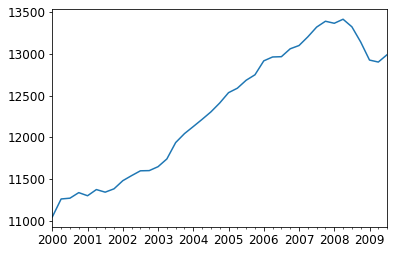

In [20]:
fig, ax = plt.subplots()
data['realgdp']['2000-03-31':].plot(ax=ax, fontsize=12);

+ На изображении хорошо видно, что рост временного ряда realgdp не является плавным. 
+ По этому графику можно сказать, что в данных временного ряда присутствуют тренды и циклические компоненты. 

Теперь, чтобы справиться с этим, мы можем использовать фильтр HP для разделения временного ряда на составляющие. 

In [25]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle, gdp_trend = hpfilter(data['realgdp'], lamb=1600)
gdp_segr = data[['realgdp']].copy()
gdp_segr['cycle'] = gdp_cycle
gdp_segr['trend'] = gdp_trend

gdp_segr

,realgdp,cycle,trend
1959Q1,2710.349,39.511915,2670.837085
1959Q2,2778.801,80.088532,2698.712468
1959Q3,2775.488,48.875455,2726.612545
1959Q4,2785.204,30.591933,2754.612067
1960Q1,2847.699,64.882667,2782.816333
...,...,...,...
2008Q3,13324.600,102.018455,13222.581545
2008Q4,13141.920,-107.269472,13249.189472
2009Q1,12925.410,-349.047706,13274.457706
2009Q2,12901.504,-397.557073,13299.061073


Здесь, на выходе, мы видим, что выделили из временного ряда цикл и трендовую составляющую. Давайте нарисуем их по очереди.

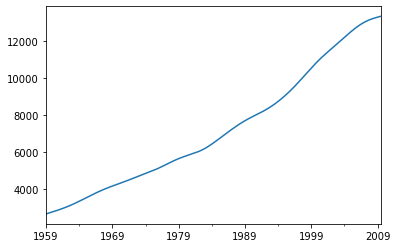

In [27]:
gdp_trend.plot();


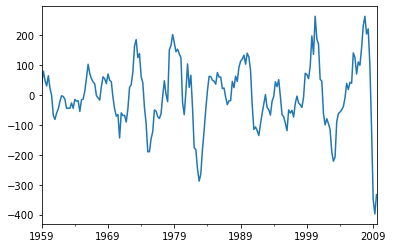

In [29]:
gdp_cycle.plot();

Здесь мы видим циклическую составляющую временного ряда. Давайте нарисуем их все вместе, чтобы у нас было четкое представление о временном ряде.

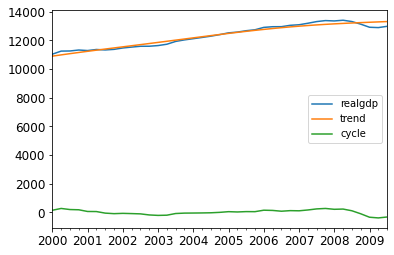

In [31]:
fig, ax = plt.subplots()

gdp_segr[['realgdp', 'trend', 'cycle']]['2000-03-31':].plot(ax=ax, fontsize=12);

В приведенном выше выводе мы видим сравнительную визуализацию нашего временного ряда и его компонент. 

Поскольку мы используем фильтр HP для извлечения гладкого тренда из временного ряда, который можно использовать для построения прогнозов, игнорируя циклическую составляющую. 

Поэтому для нас будет гораздо лучше визуализировать сравнительный график временного ряда и извлеченных трендов, что можно сделать с помощью следующих кодов.

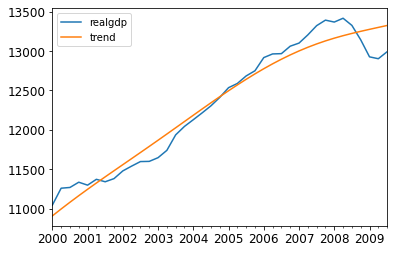

In [32]:
fig, ax = plt.subplots()

gdp_segr[['realgdp', 'trend']]['2000-03-31':].plot(ax=ax, fontsize=12);

В приведенном выше выводе мы можем легко сравнить различные линии, а также увидеть, что теперь тренд временного ряда на самом деле более гладкий, чем в более старом временном ряду. 

Такое выделение тренда или детрендинг позволяет нам прогнозировать более точные значения. 


### Преимущества фильтра Ходрика-Прескотта 

+ Поскольку он является мощным инструментом для сглаживания данных, мы можем использовать его в макроэкономике.
+ Он способен устранять колебания в краткосрочных временных рядах. Поэтому мы можем легко применять его для анализа краткосрочных временных рядов. 
+ Как правило, он дает хорошие результаты в ситуациях, когда шум распределен нормально.

### Ограничения фильтра Ходрика-Прескотта 

+ Чтобы фильтр HP работал должным образом, мы должны иметь данные в одном тренде, поскольку наличие разделенного темпа роста заставляет фильтр генерировать синтетические сдвиги в тренде.
+ С помощью этого фильтра можно проводить только статический анализ временных рядов, поскольку в динамических условиях он изменяет прошлое состояние временного ряда, что приводит к ошибочным прогнозам.
+ Этот фильтр не ориентирован на прошлое (backward-looking), поскольку его оператор запаздывания можно увидеть из F.O.C. для задач минимизации, что делает его не случайным.
+ Односторонняя версия фильтра HP обеспечивает сглаживание временного ряда, но не способна извлекать значения, которые не нужны для прогнозирования.

In [37]:
file = 'GDP.xlsx'
gdp = pd.read_excel(file, index_col=0)
gdp.head()

,GDP
4кв2011,81750569.96
1кв2012,82802794.56
2кв2012,83760443.16
3кв2012,84493594.06
4кв2012,85040283.46


<AxesSubplot:>

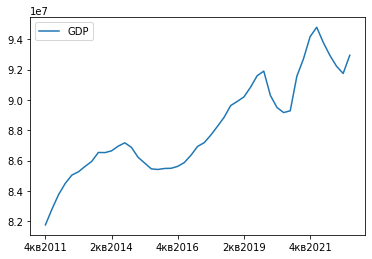

In [42]:
gdp.plot()

In [44]:
gdp['cycle'], gdp['trend'] = hpfilter(gdp['GDP'], lamb=1600)
gdp.head()

,GDP,cycle,trend
4кв2011,81750569.96,-1.924505e+06,8.367507e+07
1кв2012,82802794.56,-1.091053e+06,8.389385e+07
2кв2012,83760443.16,-3.509744e+05,8.411142e+07
3кв2012,84493594.06,1.676941e+05,8.432590e+07
4кв2012,85040283.46,5.050926e+05,8.453519e+07


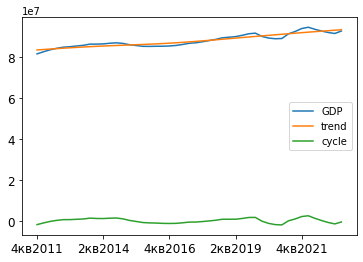

In [45]:
fig, ax = plt.subplots()

gdp[['GDP', 'trend', 'cycle']].plot(ax=ax, fontsize=12);

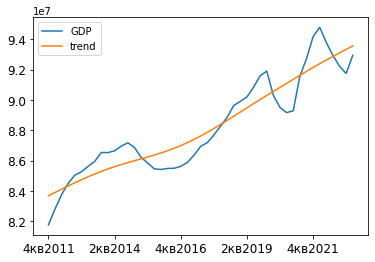

In [51]:
fig, ax = plt.subplots()

gdp[['GDP', 'trend']].plot(ax=ax,fontsize=12);

In [52]:
gdp['GDP-trend'] = gdp['GDP'] - gdp['trend']
gdp.head()

,GDP,cycle,trend,GDP-trend
4кв2011,81750569.96,-1.924505e+06,8.367507e+07,-1.924505e+06
1кв2012,82802794.56,-1.091053e+06,8.389385e+07,-1.091053e+06
2кв2012,83760443.16,-3.509744e+05,8.411142e+07,-3.509744e+05
3кв2012,84493594.06,1.676941e+05,8.432590e+07,1.676941e+05
4кв2012,85040283.46,5.050926e+05,8.453519e+07,5.050926e+05


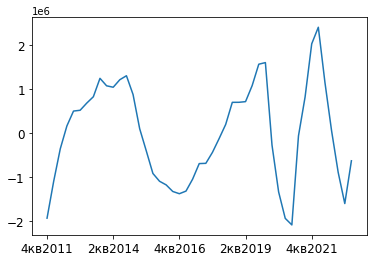

In [48]:
gdp['cycle'].plot(fontsize=12);

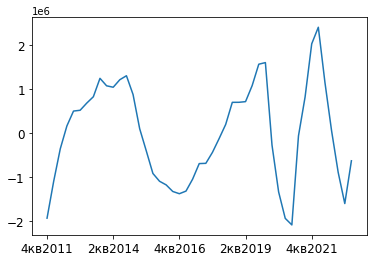

In [53]:
gdp['GDP-trend'].plot(fontsize=12);